<h3> Wohunngsanalyse </h3>

<p> Goals: Build a machine learning model to predict house pricing based on several factors and compare it for the Bundesländer </p>.

https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany

1. Import Python Modules 

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile


2. Import Data

In [2]:
housing= pd.read_csv("immo_data.csv")
housing.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


3. Preliminary analysis of the dataset:

In [3]:
print(housing.shape)
print(housing.info())

(268850, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052

In [4]:
housing.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [5]:
housing[housing.isnull().any(axis=1)]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [6]:
housing.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

These columns represent the following information:
    
 * regio1: Bundesland
 * serviceCharge: auxiliary costs such as electricity or internet in euros
 *  heatingType: Type of heating
 * telekomTvOffer: Is payed TV included if so which offer
 * telekomHybridUploadSpeed: how fast is the hybrid inter upload speed
 * newlyConst: If the building is a recent construction
 * balcony: Does the property has a balcony?
 * picturecount: how many pictures were uploaded to the listing
 * pricetrend: price trend as calculated by Immoscout
 * telekomUploadSpeed: how fast is the internet upload speed
 * totalRent: total rent (usually a sum of base rent, service charge and heating cost)
 * yearConstructed: construction year
 * scoutid: immoscout Id
 * noParkSpaces: number of parking spaces
 * firingTypes: main energy sources, separated by colon
 * hasKitchen: does the property has a kitchen?
 * geo_bln: bundesland (state), same as regio1
 * cellar: does the property has a cellar?
 * yearConstructed: binned construction year, 1 to 9
 * baseRent: base rent without electricity and heating
 * houseNumber: house number
 * livingSpace: living space in sqm
 * geo_krs: district, above ZIP code
 * condition: condition of the flat 
 * interiorQual: interior quality
 * petsAllowed: are pets allowed, yes/no or negotiable
 * street: street name
 * streetPlain: street name (plain, different formating)
 * lift: is elevator available?
 * baseRentRange: binned base rent, 1 to 9
 * typeOfFlat: type of flat
 * geo_plz: ZIP code
 * #noRooms: number of rooms
 * thermalChar: energy need in kWh/m^2a, defines the energy efficiency class
 * floor: which floor is the flat on
 * numberOfFloors: number of floors in the building
 * #noRoomsRange: binned number of rooms, 1 to 5
 * garden: does the property has a gaden
 * #livingSpaceRange: binned living space, 1 to 7
 * regio2: District or Kreis, same as geo krs
 * regio3: City/town
 * description: free text description of the object 
 * facilities: free text description about available facilities
 * heatingCosts: monthly heating costs in euros
 * energyEfficiency: energy efficiency class (based on binned thermalChar, deprecated since Feb 2020)
 * lastRefurbish: year of last renovation
 * electricityBasPrice: monthly base price for electricity in euro (deprectaded since Feb 2020)
 * electricityKwhPrice: electricity price peer kwh (deprecated since Feb 2020)
 * date: time of scraping
 

In [7]:
# Unique values.
columns = ['regio1','typeOfFlat','heatingType','condition','regio2','regio3']

for column in columns:
    print('-'*50)
    print('Column name: {c}'.format(c = column.upper()))
    print(housing[column].value_counts())

--------------------------------------------------
Column name: REGIO1
Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64
--------------------------------------------------
Column name: TYPEOFFLAT
apartment              131522
roof_storey             34787
ground_floor            31538
other                    9519
maisonette               9319
raised_ground_floor      5628
penthouse                3568
terraced_flat            3385
half_basement            2013
loft                      957
Name: typeOfFla

In [8]:
property_type = housing.groupby('typeOfFlat').date.count().reset_index()
property_type_asc = property_type.sort_values(by=['date'], ascending = False).reset_index(drop=True)
property_agr= property_type_asc.sort_values(by=['date'], ascending = False).reset_index(drop= True)
property_agr= property_agr[:4]
other_prop= property_type_asc[3:10].reset_index()
other_prop.drop(['index'],axis=1,inplace=True)

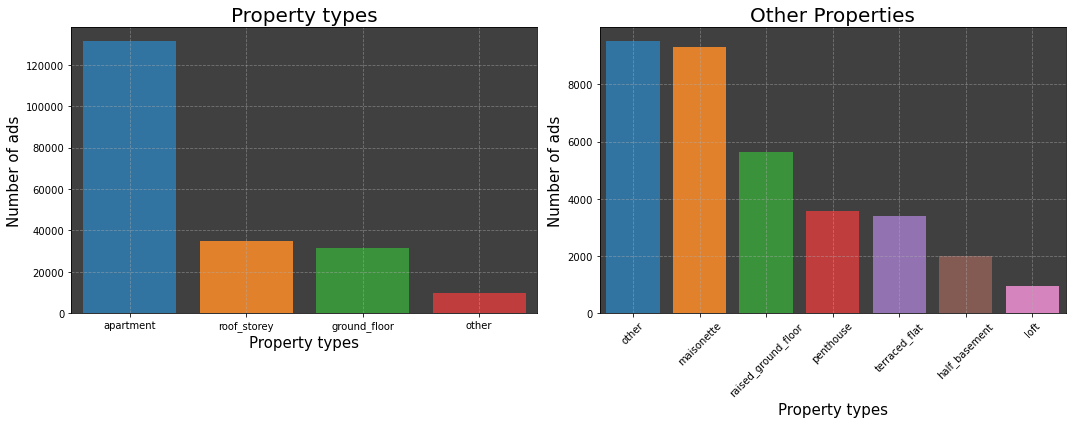

In [9]:
fig = plt.figure(figsize = (15,6))
ax1= fig.add_subplot(121)
ax1= sns.barplot(data = property_agr,x='typeOfFlat',y='date')
ax1.set_title('Property types', fontsize= 20)
ax1.set_xlabel('Property types', fontsize =15)
ax1.set_ylabel('Number of ads', fontsize = 15)
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)

ax2= fig.add_subplot(122)
ax2=sns.barplot(data =other_prop,x='typeOfFlat',y='date')
plt.xticks(rotation=45)
ax2.set_title('Other Properties', fontsize = 20)
ax2.set_xlabel('Property types', fontsize =15)
ax2.set_ylabel('Number of ads', fontsize = 15)
ax2.set_facecolor('#404040')
ax2.grid(linestyle='--', alpha = 0.5)

plt.tight_layout()
plt.show()

In [10]:
bundesland= housing.groupby(['regio1']).date.count().reset_index()
bundesland_sorted= bundesland.sort_values(by=['date'], ascending= False).reset_index(drop=True)

Text(0, 0.5, 'Number of ads')

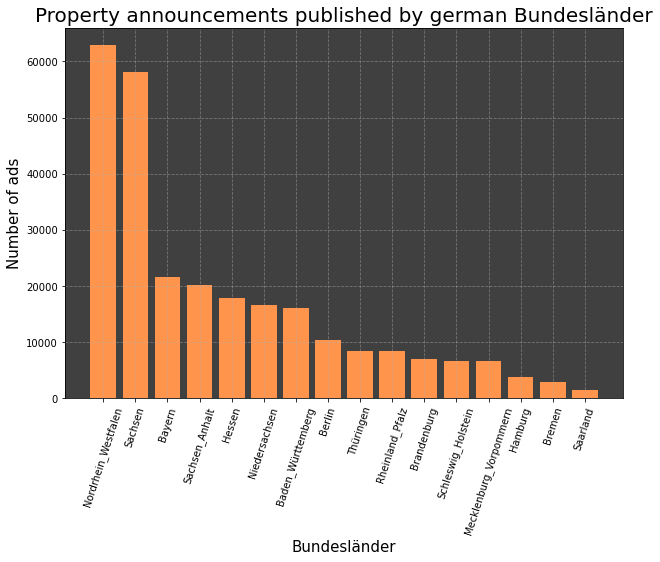

In [11]:
fig = plt.figure(figsize = (10,15))
ax1 = fig.add_subplot(2,1,1)
ax1.bar(bundesland_sorted['regio1'], bundesland_sorted['date'], color ='#ff944d')
plt.xticks(rotation=72)
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)
ax1.set_title('Property announcements published by german Bundesländer', fontsize = 20)
ax1.set_xlabel('Bundesländer', fontsize =15)
ax1.set_ylabel('Number of ads', fontsize = 15)

In [14]:
mask = (housing.regio1 == 'Nordrhein_Westfalen') & (housing.typeOfFlat == 'apartment')
housing1= housing[mask]
housing1 = housing1[['regio1', 'heatingType', 'totalRent','yearConstructed','noParkSpaces', 'baseRent', 'livingSpace','noRooms', 'numberOfFloors','regio3', 'heatingCosts']]
housing1.shape

(33957, 11)

4. Exploratory Data Analysis (EDA)


In [32]:
housing.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [37]:
data_min, data_max = rent_costs.min(), rent_costs.max()
quartiles = percentile(rent_costs, [25, 50, 75])
#print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

Min: 0
Q1: 469.800
Median: 650
Q3: 985
Max: 15751535


In [24]:
mean_m2=housing.livingSpace.mean()
median_m2=housing.livingSpace.median()
mode_m2=housing.livingSpace.mode()
variance_m2= np.var(housing.livingSpace)
std_m2=np.std(housing.livingSpace)
print(mean_m2,median_m2,mode_m2)
print(variance_m2,std_m2)

74.35554803793985 67.32 0    60.0
dtype: float64
64902.01264864849 254.7587341950193


In [25]:
corr_matrix = housing1.corr()

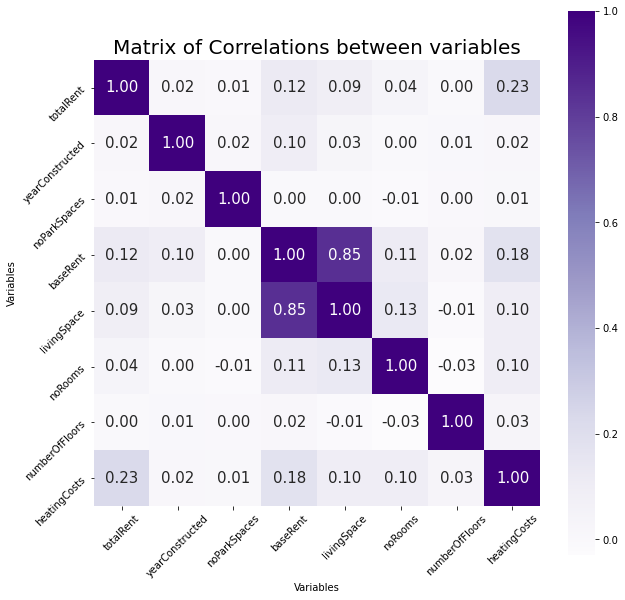

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cbar=True, square= True, annot=True, fmt='.2f',annot_kws={'size':15},cmap='Purples')
plt.title('Matrix of Correlations between variables', fontsize=20)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation = 45)
plt.yticks(rotation =45)
plt.show()

In [28]:
corr_matrix2= housing.corr()

<AxesSubplot:>

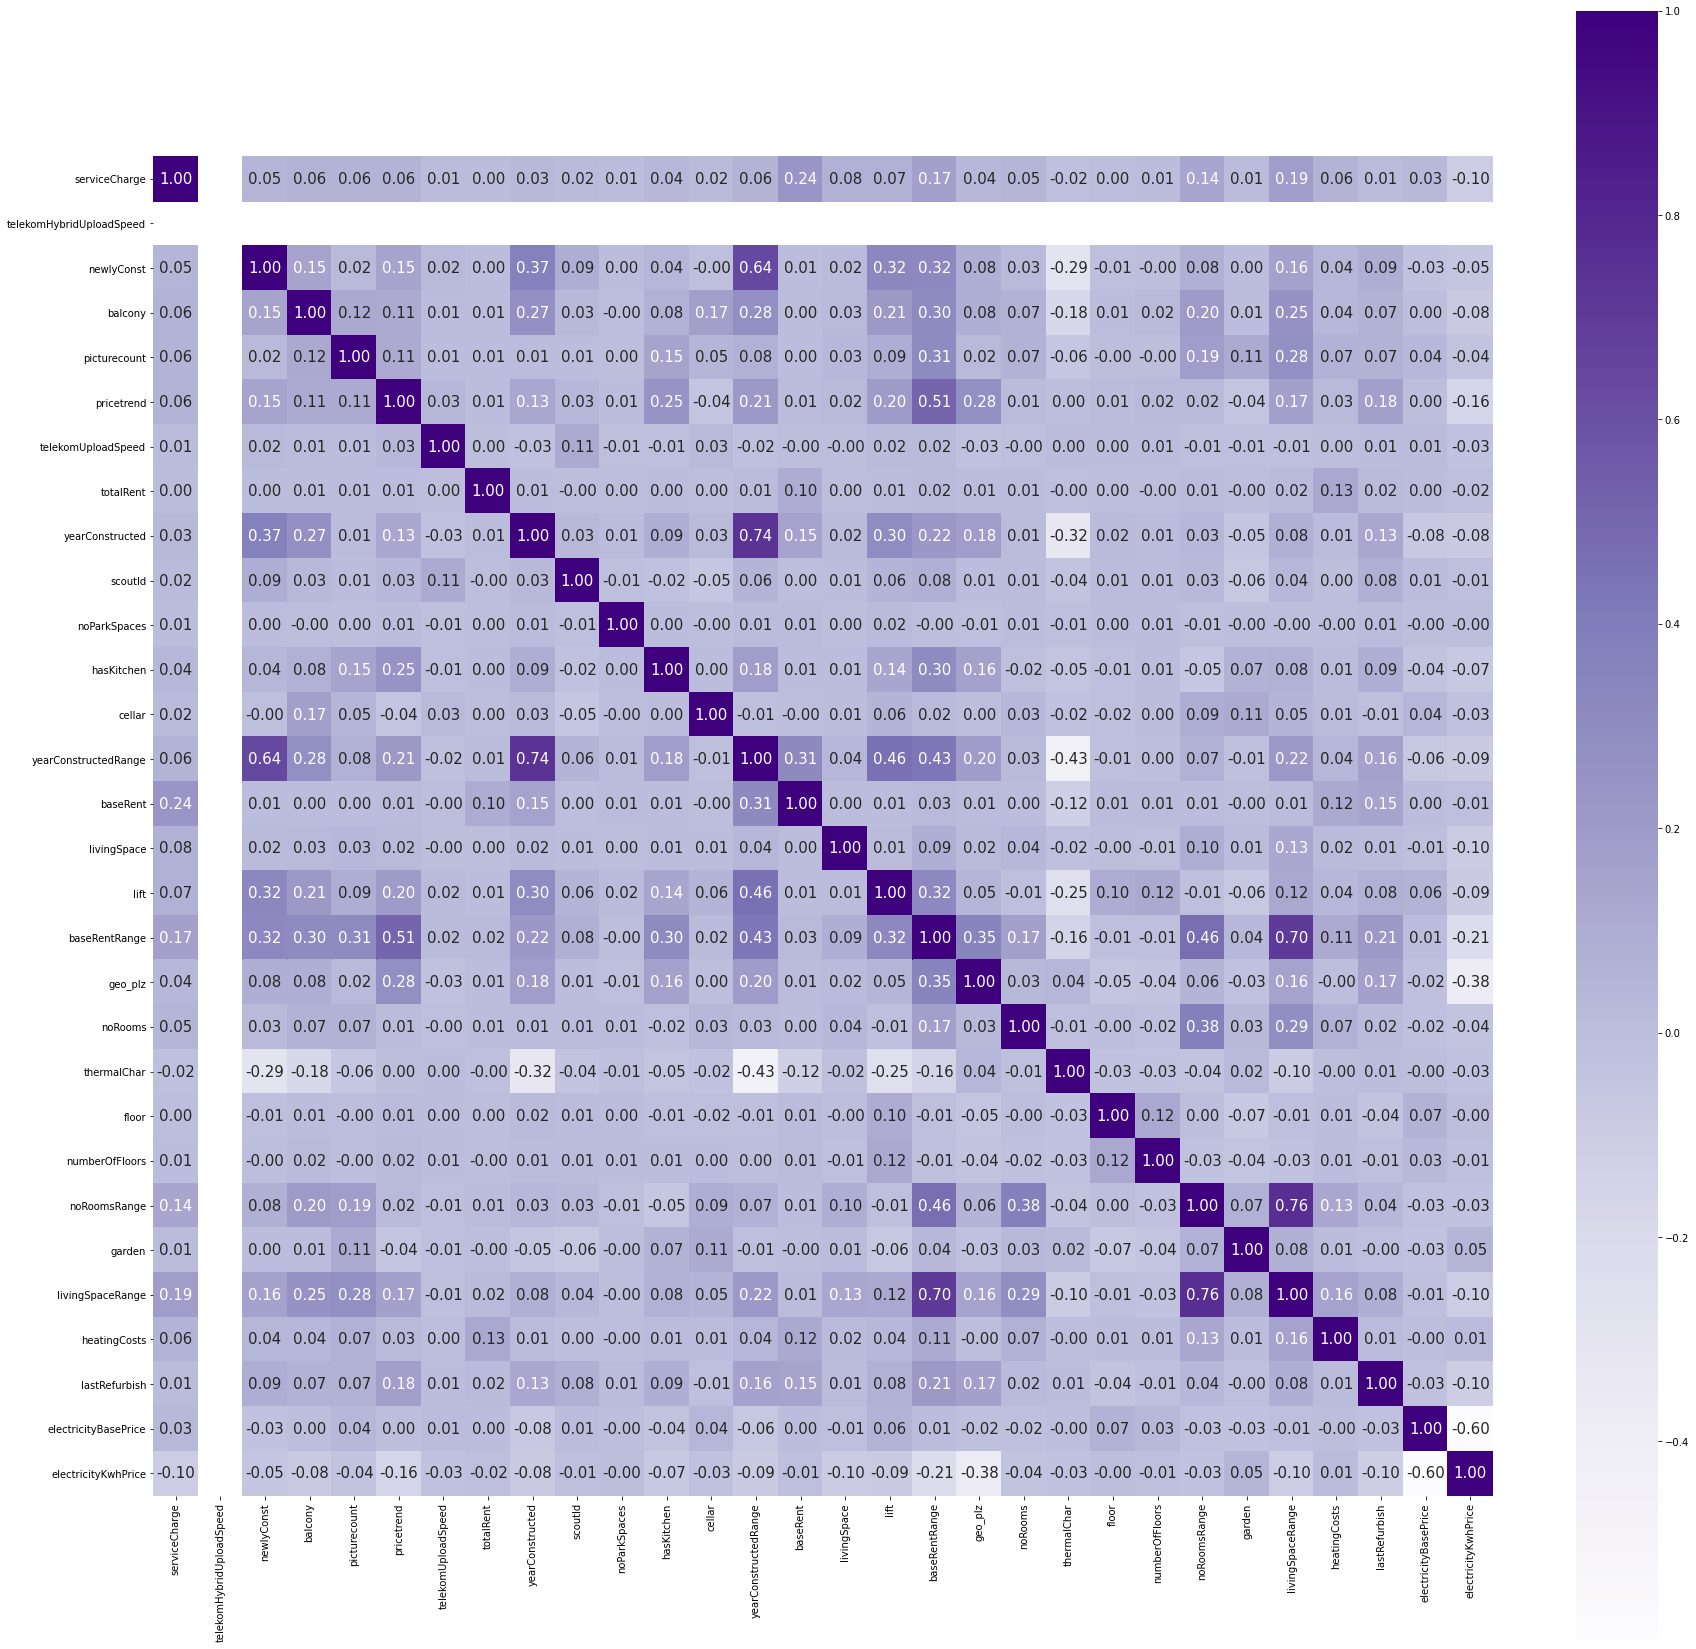

In [31]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix2, cbar=True, square= True, annot=True, fmt='.2f',annot_kws={'size':15},cmap='Purples')

In [33]:
print(housing.typeOfFlat.unique())

['ground_floor' 'apartment' 'other' nan 'roof_storey'
 'raised_ground_floor' 'terraced_flat' 'half_basement' 'maisonette'
 'penthouse' 'loft']


yearConstructed maximum value is 2090 which hasnt yet come

In [34]:
rent_cost=housing['totalRent']

In [35]:
rent_costs=rent_cost[~pd.isnull(rent_cost)]


In [ ]:
fig, axs = plt.subplots(figsize=(7,3), dpi=100)
plt.subplot(1,2,1)
sns.histplot(housing['totalRent']).set_title('Distibution of Rent Prices', weight='bold')

In [ ]:
sns.histplot(
    housing.baseRent,
    x="H", hue="date",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

In [ ]:

plt.figure(figsize=[12,4])
sns.distplot(housing['yearConstructed'], color='red')
plt.title('Year of Construction')
plt.show()